# Task 2: Exploratory Data Analysis (EDA)
## Project 1: General EDA - Global Superstore Dataset

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [4]:
# Load the dataset
df = pd.read_csv('global_superstore.csv')
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


### Data Cleaning

In [5]:
# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Only apply filtering on numeric columns
df = df[~((df[Q1.index] < (Q1 - 1.5 * IQR)) | (df[Q1.index] > (Q3 + 1.5 * IQR))).any(axis=1)]


### Statistical Analysis

In [9]:
# Summary statistics
df.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,36311.000000,36311.0,36311.000000,36311.000000,36311.00000,36311.000000,36311.000000,36311.000000,36311.000000
mean,0.091622,1.0,14.340764,3.105670,24854.88929,96.411198,9.534866,2012.784445,31.303655
std,0.148513,0.0,23.581944,1.875963,14682.63600,100.297029,10.700265,1.096574,14.407371
min,0.000000,1.0,-55.125000,1.000000,1.00000,1.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,1.980000,2.000000,12064.00000,27.000000,2.220000,2012.000000,20.000000
50%,0.000000,1.0,8.790000,3.000000,24855.00000,59.000000,5.480000,2013.000000,33.000000
75%,0.200000,1.0,23.790000,4.000000,37303.50000,131.000000,12.650000,2014.000000,44.000000
max,0.500000,1.0,91.995400,9.000000,51290.00000,581.000000,57.200000,2014.000000,53.000000


In [10]:
# Correlation matrix
df.corr(numeric_only=True)

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
Discount,1.000000,NaN,-0.460718,0.062424,-0.161947,-0.066682,-0.066773,0.007183,0.018663
记录数,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profit,-0.460718,NaN,1.000000,0.138465,0.048350,0.440806,0.380982,-0.004471,-0.007508
Quantity,0.062424,NaN,0.138465,1.000000,-0.183352,0.229622,0.192825,-0.002797,0.020928
Row.ID,-0.161947,NaN,0.048350,-0.183352,1.000000,-0.056702,-0.048314,0.005478,-0.027236
Sales,-0.066682,NaN,0.440806,0.229622,-0.056702,1.000000,0.770340,0.006947,-0.007267
Shipping.Cost,-0.066773,NaN,0.380982,0.192825,-0.048314,0.770340,1.000000,0.007706,-0.005908
Year,0.007183,NaN,-0.004471,-0.002797,0.005478,0.006947,0.007706,1.000000,-0.019561
weeknum,0.018663,NaN,-0.007508,0.020928,-0.027236,-0.007267,-0.005908,-0.019561,1.000000


### Visualizations

C:\Users\kamal\AppData\Local\Temp\ipykernel_4404\178940719.py:2: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kamal\AppData\Local\Temp\ipykernel_4404\178940719.py:2: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kamal\AppData\Local\Temp\ipykernel_4404\178940719.py:2: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kamal\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kamal\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kamal\AppData\Roaming\Python\Py

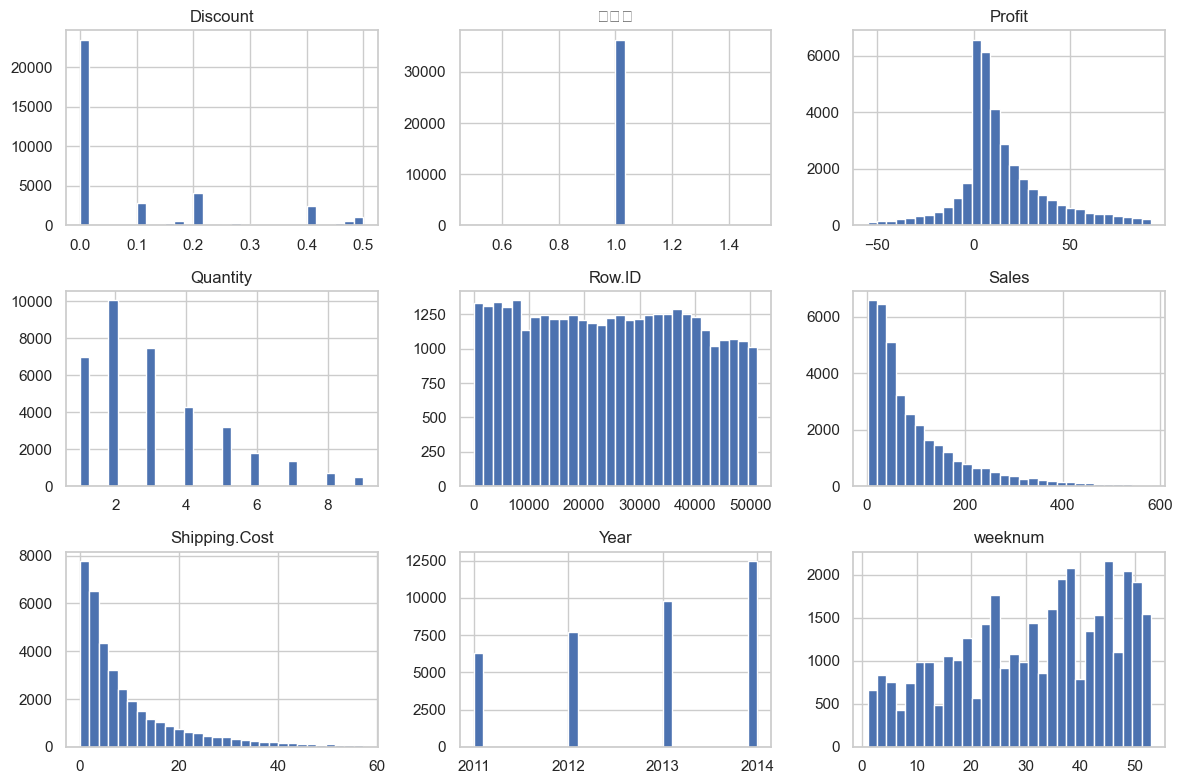

In [11]:
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

C:\Users\kamal\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kamal\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kamal\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


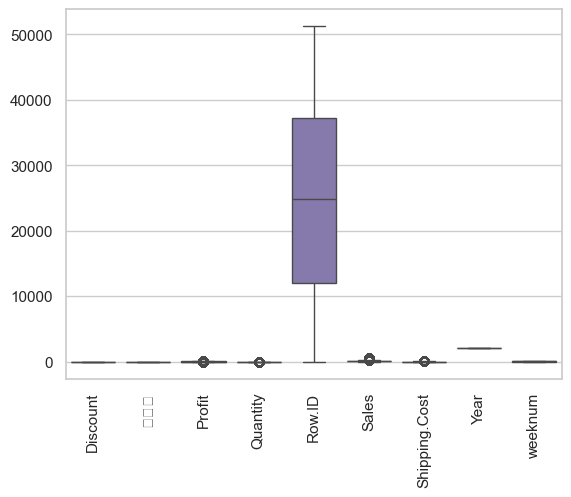

In [12]:
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.show()